# Table of contents


- [1. Introduction](#1)

    - [1.1 General Considerations](#11)

    - [1.2 Overview](#12)

- [2. Real-life Phenomenon: IQ Score](#2)

    - [2.1 The Variables](#21)

    - [2.1.1 IQ](#211)

    - [2.1.2 Age](#212)

    - [2.1.3 Gender](#213)

    - [2.1.4 Height](#214)
    
- [3. Combining the variables](#3)

    - [3.1 Correlating values](#31)
    
- [4. Sense-check of the generated dataset](#4)

- [5. Summary](#5)

- [6. Conclusion](#6)

In [36]:
#please run this cell to import all necessary packages and proceed top to bottom
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sb

# 1. Introduction <a class="anchor" id="1"></a>

In this Jupyter workbook I will walk through the process of synthesising a dataset using Python. The dataset will aim to simulate a real-world phenomenon across at least 100 different datapoints and at least 4 different variables. The challenge lies not only in understanding how to use Python and available packages to synthesise a dataset but also in gaining an understanding of the data this project aims to simulate.

The variables for which the datapoints are created will be investigated to determine their type and likely distributions and also how they relate to one-another to ensure a product that is close to the real-life phenomenon.

## 1.1 General Considerations <a class="anchor" id="11"></a>

One might ask: Why synthesise a dataset if I can simply go online to find data? 

A fairly straight-forward way to simulate a dataset could be to take an existing dataset, analyse its statistics and use the data on values, minimum, maximum, average, median, correlations and regressions to feed into a function that will either create the exact same dataset or randomise the dataset along the same base statistics.

However, researching different approaches on how to synthesise data brings forward many sources that are related to machine learning, deep learning and testing calculations as well as applications. Synthesised data can be used to test or develop applications in situations where collection of real data would delay development because of the time and resources it would require.(1) It is not difficult to imagine such a situation in a corporate environment. Furthermore, it can serve as a basis to train a machine learning algorithm on.

Therefore, this project will attempt to model a dataset not recreating a specific already existing dataset but after assumptions and insights that were derived from researching the real-life-phenomenon

#### References

(1) https://medium.com/@maxbendick/synthesizing-deep-learning-training-data-db100de1b7f0

## 1.2 Overview <a class="anchor" id="12"></a>

This project aims to synthesise a dataset around IQ score. It aims to create a dataset of 100 datapoints, corresponding to 100 people across the variables: IQ, Gender, Age and Height.

# 2. Real-life phenomenon: IQ Score <a class="anchor" id="2"></a>

IQ, Intelligence Quotient, lends itself fabulously to an exploration for a data scientist. It is a well-researched area, with a lot of studies to draw inspiration as well as data from. The name itself suggests its mathematical nature and statistics plays a significant role in the field of psychology. 

IQ is not the same as intelligence, even though a point can be made that both are closely correlated. While intelligence has multiple definitions, mostly centered around ones ability to use logic and reasoning, while the IQ of a person is the result they scored at a specific point in time and cannot be assigned without an IQ test. (1) There is no one IQ test and the tests conducted can vary depending on the underlying definition of intelligence, which has sparked discussions around the validity of the tests. (2) While certainly an interesting field of study, this project is does not aim to discuss the validity of IQ but is more concerned with the scores and how studies have suggested correlations with other areas of life.

#### References

(1) Introduction to Clinical Psychology, Jeffrey Hecker, Geoffrey Thorpe, 2005, p.210

(2) Psychology: A Very Short Introduction, Gillian Butler, Freda McManus, 1998, chapter 7


## 2.1 The Variables <a class="anchor" id="21"></a>

A big part of the appeal of determining people's IQ score is to see if it stands in relation to other attributes of a person's life. Researchers have found a number of interesting connections, [this article](https://www.vox.com/2016/5/24/11723182/iq-test-intelligence) displays only some of them. For example:

> Having a higher IQ protects you from death

> IQ is correlated with career success and wealth, but not necessarily happiness

> Most people have average intelligence

Considering the vast amount of information around IQ it seems tangible to model a realistic dataset of 100 people around their IQ score. Python has in-built commands and available packages that allow to quickly produce random numbers. See also my previous assignment on the functionalities of the numpy.random package. The following is a quick demonstration of how these functions can be used to create a dataset:

In [8]:
#The following code uses numpy and pandas to generate random values that can be put and displayed as a pandas dataframe
#ensure first cell at the top of the notebook is run

#creating empty lists for the different columns
listIQ = []
listAge = []
listIncome = []
listGender = []

#determining size of the dataset/lists -  - bigger to ensure distributions are well visible
p = 1000

#assuming IQ values can fall between 65 and 150 and appending the random value to the IQ list
for i in range(p):
    x = np.random.randint(65,150)
    listIQ.append(x)

#assuming an age range between which the IQ test could have been taken
for i in range(p):
    x = np.random.randint(5,90)
    listAge.append(x)

#assuming an income range
for i in range(p):
    x = np.random.randint(15000,55000)
    listIncome.append(x)

    #gender
for i in range(p):
    gender = ['m', 'w']
    x = np.random.choice(gender)
    listGender.append(x)

#pull data together
#see pandas documentation:
#https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.html
d = {'IQ': listIQ, 'Age': listAge, 'Income': listIncome, 'Gender': listGender}
df = pd.DataFrame(data=d)
print(df)


#showing correlation
print(df.corr())

      IQ  Age  Income Gender
0     68   77   35169      m
1    138    9   19593      w
2    105   24   22778      m
3    111   17   25782      m
4    125   77   41558      m
5     98   28   51710      w
6     95   14   37140      w
7    127   41   50012      m
8    117   33   16624      m
9    138   20   18483      w
10   114   88   22728      m
11   112   23   35424      w
12    78   88   53382      m
13   111   59   36491      w
14   119   83   30211      m
15    73   30   20004      w
16   140   61   51977      m
17   142   40   41445      m
18   132   15   32975      w
19    84   73   16024      w
20   104   80   42334      m
21   123   76   43862      m
22   117    8   17341      m
23   101   48   38713      w
24   104   67   38327      w
25   109   19   34369      m
26    81   43   47964      m
27   117   34   28713      w
28   132   77   53612      w
29    92   83   49440      w
..   ...  ...     ...    ...
970   77   54   42038      m
971  133   25   48139      m
972  140   45 

However, a flaw with this method emerges: While it does reliably generate numbers within the specified limits, there is no consistency with real-world scenarios. The Correlations between the values can change dramatically and it is difficult to draw meaningful conclusions from the dataset. It is therefore unusable for realistic simulation purposes. A look at the graphs below explains why. 

As per the design of the commands in numpy, the samples were drawn from uniform distributions, meaning, that every outcome is equally likely to occur. While this is arguably acceptable for the variable of Gender in the dataset, it has been established that many natural phenomena, such as height and also IQ resemble a normal or Gaussian distribution.

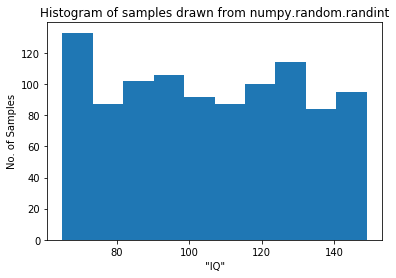

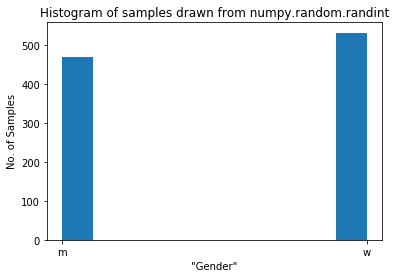

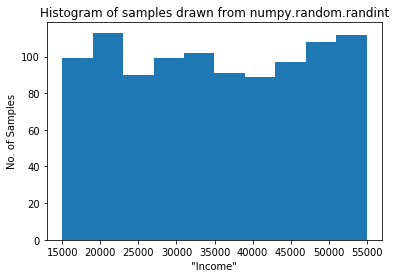

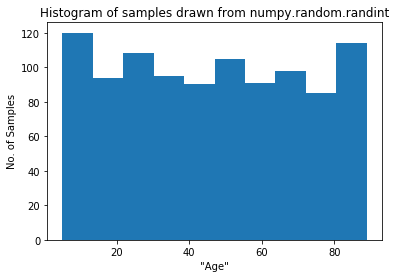

In [6]:
#using matplotlib.pyplot to plot dataset above

plt.hist(listIQ)
plt.xlabel('"IQ"')
plt.ylabel('No. of Samples')
plt.title('Histogram of samples drawn from numpy.random.randint')
plt.show()
plt.hist(listGender)
plt.xlabel('"Gender"')
plt.ylabel('No. of Samples')
plt.title('Histogram of samples drawn from numpy.random.randint')
plt.show()
plt.hist(listIncome)
plt.xlabel('"Income"')
plt.ylabel('No. of Samples')
plt.title('Histogram of samples drawn from numpy.random.randint')
plt.show()
plt.hist(listAge)
plt.xlabel('"Age"')
plt.ylabel('No. of Samples')
plt.title('Histogram of samples drawn from numpy.random.randint')
plt.show()

### 2.1.1 IQ <a class="anchor" id="211"></a>

Compare the above graph for IQ to the "bell curve" below that is characteristic of a normal distribition. IQ approximates a normal distribution across a population. The median of the IQ distribution is 100 with a standard deviation of 15 and the possible scores fall between 40 and 160. (1) An IQ scale is ordinal data, meaning that the datapoints can be ranked and are naturally ordered (f.ex. from low IQ to high IQ) (2). Looking at this distribution, we can see that the majority of people will fall around the median or average IQ scores.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/39/IQ_distribution.svg/2000px-IQ_distribution.svg.png" width="420">
Normalized IQ distribution with mean 100 and standard deviation 15 (1).

#### References

(1) https://en.wikipedia.org/wiki/Intelligence_quotient

(2) https://en.wikipedia.org/wiki/Ordinal_data

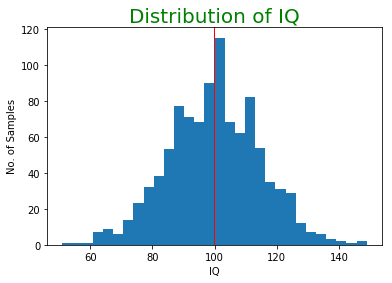

In [14]:
#using numpy.random & scipy.statsto generate data modelled after the IQ distribution
#plotting result with matplotlib
np.random.seed(32) #initiating a seed for consistent result

#https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html#numpy.random.normal
mean, std = 100, 15
#https://stackoverflow.com/questions/33160367/numpy-how-to-generate-a-normally-distributed-set-of-integers
#used above to ensure only integers are drawn
IQ = norm.ppf(np.random.random(1000), loc=mean, scale=std).astype(int) #using high samplesize (1000) to ensure clear outcome, rounding results to create integers
plt.hist(IQ, 30) #determining bins
#formatting the plot
plt.axvline(IQ.mean(), color='r', linewidth=1) #https://stackoverflow.com/questions/16180946/drawing-average-line-in-histogram-matplotlib
plt.xlabel('IQ')
plt.ylabel('No. of Samples')
plt.title('Distribution of IQ', color='g', fontsize=20)
plt.show()

### 2.1.2 Age <a class="anchor" id="212"></a>

The distribution of age looks very different again. Age, as is IQ, is ordinal data which can be naturally ranked from low to high. As can be seen in the pyramid chart below however, it does not clearly follow any distribution for which `numpy.random` provides a handy function for. Instead, the percentage breakdown of indexmundi can be used in conjunction with the `numpy.random.choice` function, which allows to draw weighted samples from a list. Find below a code which replicates the agebrackets by using the percentages assigned to them on indexmundi.


<img src="https://www.indexmundi.com/graphs/population-pyramids/ireland-population-pyramid-2016.gif" width="420">
Population pyramid, Ireland 2016 (3)

(3) https://www.indexmundi.com/ireland/age_structure.html

(array([209.,   0., 118.,   0.,   0., 428.,   0., 117.,   0., 128.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

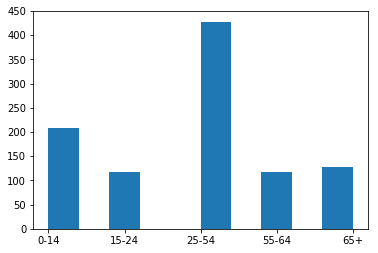

In [12]:
#Attempt to recreate an age distribution
np.random.seed(32)

#replicate agebrackets from source:
#https://www.indexmundi.com/ireland/age_structure.html

agebrackets = ['0-14', '15-24', '25-54', '55-64', '65+']
agedist = np.random.choice(agebrackets, 1000, p=[0.215, 0.12, 0.43, 0.105, 0.13]) #draw samples with the percentages used as probabilities
agedist.sort() #ensure bins do not show in random order
plt.hist(agedist)

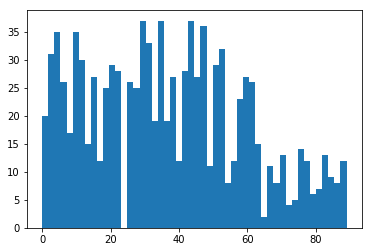

In [13]:
#in order to be able to better analyze it take it out of brackets
np.random.seed(32)

i=1
p=1000
listage=[]


for i in range(p):
    agebrackets = [np.random.randint(0,14), np.random.randint(15,24), np.random.randint(25,54), np.random.randint(55,64), np.random.randint(65,90)]
    agedist = np.random.choice(agebrackets, p=[0.215, 0.12, 0.43, 0.105, 0.13])
    listage.append(agedist)


plt.hist(listage, bins = 50)
plt.show()

### 2.1.3 Gender <a class="anchor" id="213"></a>

As the gender distribution is close to 50/50, it is fair to let the random module make its pick. While often a heated discussion, latest data suggests that men and women show no significant difference in IQ scores overall. (1)

#### References

(1) https://www.psychologytoday.com/us/blog/beautiful-minds/201207/men-women-and-iq-setting-the-record-straight


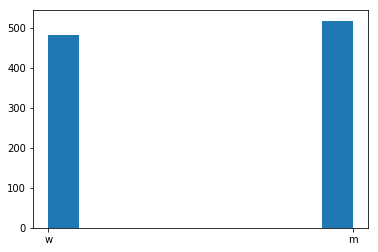

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
np.random.seed(32)

values = ['m', 'w']
gender = np.random.choice(values,1000)

plt.hist(gender)
plt.show()

### 2.1.4 Height <a class="anchor" id="214"></a>

Height, similar to IQ, tends to be described by a bell-curve approximating a normal distribution. We learn from Wikipedia that the average height of men is 177cm with a std of ca. 7.6cm. (1) (2) With this, the same code as above can be used to generate samplesa round the mean and std.


#### References

(1) https://en.wikipedia.org/wiki/List_of_average_human_height_worldwide

(2) https://en.wikipedia.org/wiki/Standard_deviation#Standard_deviation_of_average_height_for_adult_men



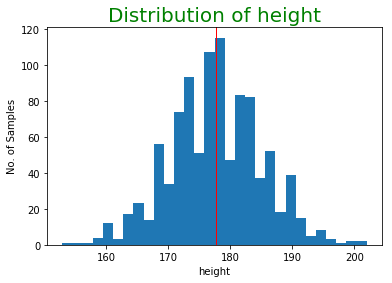

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
np.random.seed(32)

#https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html#numpy.random.normal
mean, std = 177, 7.6 #standard deviation approximated from https://en.wikipedia.org/wiki/Standard_deviation
#https://stackoverflow.com/questions/33160367/numpy-how-to-generate-a-normally-distributed-set-of-integers
#used above to ensure only integers are drawn
height = norm.ppf(np.random.random(1000), loc=mean, scale=std).astype(int) #using high samplesize to ensure clear outcome, rounding results to create integers
plt.hist(height, 30) #determining bins
#formatting the plot
plt.axvline(height.mean(), color='r', linewidth=1) #https://stackoverflow.com/questions/16180946/drawing-average-line-in-histogram-matplotlib
plt.xlabel('height')
plt.ylabel('No. of Samples')
plt.title('Distribution of height', color='g', fontsize=20)
plt.show()

# 3. Combining the Variables <a class="anchor" id="3"></a>

The different variables and their distributions were discussed above. If combining them into a DataFrame the result will look something like below:

In [16]:
#summary
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sb
np.random.seed(32)

mean, std = 100, 15
IQ = norm.ppf(np.random.random(1000), loc=mean, scale=std).astype(int) 

mean, std = 178, 7.5
height = norm.ppf(np.random.random(1000), loc=mean, scale=std).astype(int)


#agebrackets = ['0-14', '15-24', '25-54', '55-64', '65+']
#agedist = np.random.choice(agebrackets, 1000, p=[0.215, 0.12, 0.43, 0.105, 0.13])
i=1
p=1000
listage=[]


for i in range(p):
    agebrackets = [np.random.randint(0,14), np.random.randint(15,24), np.random.randint(25,54), np.random.randint(55,64), np.random.randint(65,90)]
    agedist = np.random.choice(agebrackets, p=[0.215, 0.12, 0.43, 0.105, 0.13])
    listage.append(agedist)

values = [0, 1] #0=men, 1=women, easier to calculate
gender = np.random.choice(values,1000)

#print(IQ)
#print(agedist)
#print(gender)


#Pulling data into one dataframe
#Source: https://stackoverflow.com/questions/20763012/creating-a-pandas-dataframe-from-a-numpy-array-how-do-i-specify-the-index-colum
dataset = pd.DataFrame({'IQ':IQ,'Age':listage, 'Gender':gender, 'Height':height})
print(dataset)


      IQ  Age  Gender  Height
0    116    7       0     183
1     95    7       1     181
2    102   45       0     180
3    125   11       0     176
4    109   50       0     182
5    113   43       0     178
6     80   70       0     182
7    121   39       1     175
8    104   22       1     182
9    103   26       0     180
10    80   10       1     174
11    94   25       1     172
12   106   45       0     182
13    97   26       1     187
14   101   69       0     171
15   108   47       0     166
16   103   21       1     171
17    75   60       0     171
18   102   63       0     171
19   110   84       0     169
20   120   48       1     166
21    80    8       0     174
22   119   31       0     184
23    98   43       0     172
24    98   15       1     181
25   148   60       1     183
26    85   57       0     169
27   108   31       0     178
28    85   23       0     181
29   113   43       1     179
..   ...  ...     ...     ...
970  125   20       1     184
971   91  

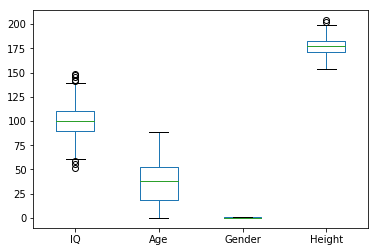

In [17]:
#visualising the dataset
np.random.seed(32)

dataset.plot(kind='box')
plt.show()

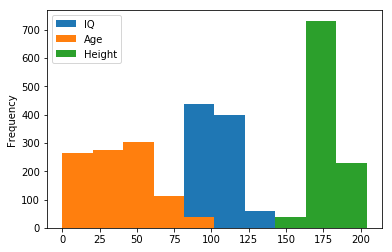

In [18]:
#a look at the distributions generated
#disregard gender as values are only 1 and 0
dswogender = pd.DataFrame({'IQ':IQ,'Age':listage,'Height':height})
dswogender.plot(kind='hist')
plt.show()

In [19]:
#correlation
dataset.corr()

,IQ,Age,Gender,Height
IQ,1.000000,0.034704,0.053821,-0.024692
Age,0.034704,1.000000,0.004902,-0.016682
Gender,0.053821,0.004902,1.000000,0.010765
Height,-0.024692,-0.016682,0.010765,1.000000


## 3.1 Correlating values <a class="anchor" id="31"></a>

Above dataset is already looking a lot better than the previous one. The variables it contains are sampled from distributions that apprximate the distributions these variables have in the real-world. Every variable in itself now displays more realistic values in terms of its mean and standard deviation, as opposed to the first example where all variables were drawn from a uniform distribution. However, it does not approximate a real dataset since the variables do not have the same relationships and dependencies one would expect when looking into research on IQ correlations.

Rsearch has shown, that height and IQ are consistently, albeit modestly, correlated. (1) The different genders also have different height averages, which would need to be considered. In a knock-on effect, it needs to be made sure that height correctly correlated to IQ, while matching the gender-specific values. (2) Age however, has no significant impact on IQ. A study has shown that people who did very well in an IQ test as a teenager tended to do equally well at age 90. (3)

The following is an overview of the discussed characteristics and how this project aims to synthesise them: 

| Variable          | Distribution expected | Data Type  | Type    | Relationship              |
| -------------     |:--------        -----:| ----     -:| ----  -:| ----                    -:|
| **IQ**            | Normal distribution   | Ordinal    | Integer | Correlation to Height     |
| **Gender**        | Binomial distrbution  | Nominal    | Integer | Correlation to Height     |
| **Height**        | Normal distribution   | Ratio      | Integer | Correlation to IQ, Gender |
| **Age**           | custom, see above     | Ratio      | Integer | No correlations           |


The `numpy.random` module offers a function to generate correlated values, such as `np.random.multivariate_normal` and one can find several approaches online on how to translate correlation into code. One example from user 'unutbu' on Stackoverflow can be seen below. While it is easy to get the correlation values from a dataset through commands such as '.corr()' and '.describe()' it is not as easy to reverse-engineer these operations without a solid knowledge of mathematics and/or statistics.

The first example below shows how to generate correlated values, the correlation can be nicely observed in the attached scatterplot. It can be seen, how as one value increases, the other tends to increase as well.

#### References

(1) https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3617178/

(2) https://en.wikipedia.org/wiki/List_of_average_human_height_worldwide

(3) https://www.vox.com/2016/5/24/11723182/iq-test-intelligence

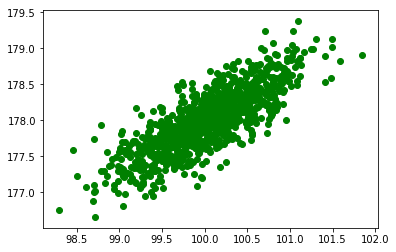

min IQ 98.29108366771166
max IQ 101.84238123963631


In [22]:
#example of correlating values of IQ and Height
mean = 100, 178 #IQ, Height

#Adapted from: https://stackoverflow.com/questions/16024677/generate-correlated-data-in-python-3-3/16025584#16025584
np.random.seed(32)
linalg = np.linalg

num_samples = 1000
num_variables = 2
cov = [[0.3, 0.2], [0.2, 0.2]] #covariance

L = linalg.cholesky(cov)
uncorrelated = np.random.standard_normal((num_variables, num_samples))
correlated = np.dot(L, uncorrelated) + np.array(mean).reshape(2,1)
# print(correlated.shape)
# (2, 1000)
plt.scatter(correlated[0, :], correlated[1, :], c='green')
plt.show()

print('min IQ', min(correlated[0, :]))
print('max IQ', max(correlated[0, :]))

On closer observation there is a flaw to this method for the purpose of this project. While correlated and having the correct mean value, the range isn't wide enough to accomodate a realistic model. Above, IQ values only stretch between 98.29 and 101.84 because the function does not take the std into account. Lacking the mathematical understanding to adapt the above formula to accomodate for the standard deviation, below is a simpler way to get the desired output. 

Using the `numpy.random` package, an infinite loop was created which will generate random dataframes, until the desired correlation has been generated (note however, the larger the dataset is supposed to be, the computation may take long):

Correlation: 0.23096855248906725
     IQ  Height
0    90     175
1    94     172
2    95     182
3   120     180
4   134     178
5   103     170
6   101     183
7   117     182
8    85     177
9    90     173
10  112     171
11   79     166
12   95     186
13   92     184
14  111     185
15   95     181
16  114     189
17  103     186
18  103     165
19  108     178
20   90     179
21  108     184
22  121     178
23   80     177
24  125     175
25   63     170
26   97     175
27  135     175
28  100     175
29  103     178
..  ...     ...
70   79     177
71  106     180
72   93     166
73   83     165
74  123     185
75  113     197
76   89     175
77  122     187
78   85     173
79  123     178
80   89     194
81  106     174
82  110     192
83   90     174
84  101     178
85   58     171
86   95     176
87  102     169
88   97     164
89   87     179
90   86     179
91   97     171
92   91     181
93  102     186
94   84     169
95   85     171
96   81     171
97  109     183
98  122

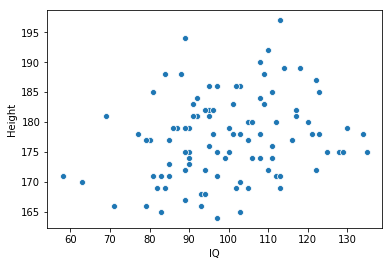

In [25]:
#feed information to create the two distributions
meanIQ, stdIQ = 100, 15
meanH, stdH = 178, 7.5

#seeding the generator
np.random.seed(32)

while 1 != 2: #infinite
    #seed = np.random.randint(1,100000,1)
    #np.random.seed(seed) #
    IQ = norm.ppf(np.random.random(100), loc=meanIQ, scale=stdIQ).astype(int) #IQ distribution values
    height = norm.ppf(np.random.random(100), loc=meanH, scale=stdH).astype(int) #Height distribution values
    df = pd.DataFrame({'IQ':IQ,'Height':height}) #convert to pandas dataframe
    x = df['IQ'].corr(df['Height']) #calculate correlation coefficient, https://stackoverflow.com/questions/42579908/use-corr-to-get-the-correlation-between-two-columns
    if x > 0.2: #check if the generated samples meet a 0.2 correlation
        break #if yes, exit loop
    else:
        continue
        
print('Correlation:', x) #correlation coefficient
print(df)

sb.scatterplot(x='IQ', y='Height', data=df)
plt.show()
    

The above generated a correlated dataframe between height and IQ. By inputting the standard deviations, the spread of the data models the real life more accurately. The scatterplot indicates the correlation. However, the correlation is modest. As discussed, gender seems to have no noteworthy correlation to IQ. Gender does however have a correlation to height. The below code does therefore incorporate an additional piece of code. 

Firstly, a random list of the gender is created. Then, an if statement pulls from either a normal distribution around the mean and std of male height or female height and adds the generated values into a second column. Then the same strategy as above is employed to randomly generate a third column, IQ, which matches in the desired correlation to the height column. Lastly, as IQ is fairly stable across age, the above generated age distribution is used and appended into a third column. The values are drawn randomly and children (ages 1-14) are filtered out before being attached.

In [30]:
#seeding the generator
np.random.seed(6)
#giving choices for gender and adding mean and std for gender heights
g= [1,0]
meanHM, meanHF, stdHM, stdHF = 178, 163, 7.5, 6
meanIQ, stdIQ = 100, 15

#create gender distribution
gender = np.random.choice(g,100)

#convert numpy array to pandas dataframe
GG = pd.DataFrame({'gender':gender})

#define a function to match appropriate height samples to gender
def fx(x):
    if x == 1:
        return norm.ppf(np.random.random(1), loc=meanHM, scale=stdHM).astype(int)
    elif x == 0:
        return norm.ppf(np.random.random(1), loc=meanHF, scale=stdHF).astype(int)

#use above function on GG dataframe to append second column height
GG['height'] = GG['gender'].apply(fx) #https://stackoverflow.com/questions/34962104/pandas-how-can-i-use-the-apply-function-for-a-single-column
GG['height'] = GG['height'].str.get(0) #https://stackoverflow.com/questions/38147447/how-to-remove-square-bracket-from-pandas-dataframe


#print(GG)
#sb.scatterplot(data=GG, x='height', y='gender')
#GG.describe()

#use above code to match correlated IQ
while 1 != 2: #infinite
    #seed = np.random.randint(1,100000,1)
    #np.random.seed(seed) #
    IQ = norm.ppf(np.random.random(100), loc=meanIQ, scale=stdIQ).astype(int) #IQ distribution values
    #height = norm.ppf(np.random.random(100), loc=meanH, scale=stdH).astype(int) #Height distribution values
    df = pd.DataFrame({'IQ':IQ}) #convert to pandas dataframe
    ds = pd.concat([GG, df], axis=1) #https://stackoverflow.com/questions/20602947/append-column-to-pandas-dataframe
    x = ds['IQ'].corr(ds['height']) #calculate correlation coefficient, https://stackoverflow.com/questions/42579908/use-corr-to-get-the-correlation-between-two-columns
    if x > 0.2 and x < 0.3: #check if the generated samples meet between 0.2 and 0.3 correlation
        break #if yes, exit loop
    else:
        continue
i = 1
p = 100
listage = []

while len(listage) < 100:
    agebrackets = [np.random.randint(0,14), np.random.randint(15,24), np.random.randint(25,54), np.random.randint(55,64), np.random.randint(65,90)]
    agedist = np.random.choice(agebrackets, p=[0.215, 0.12, 0.43, 0.105, 0.13])
    if agedist >= 0 and agedist <= 14:#excluding children from the dataset
        continue
    else:
        listage.append(agedist) #excluding children from the dataset
        dflist = pd.DataFrame({'Age': listage}) #turn list into a dataframe
        finalDataset = pd.concat([ds, dflist], axis =1) #attach to above dataframe
        
        
print(finalDataset)

#sb.scatterplot(x='IQ', y='height', data=ds)

    gender  height   IQ  Age
0        1     183  103   57
1        0     159   89   40
2        0     157  111   58
3        1     177  103   33
4        1     174   91   37
5        0     166   81   21
6        0     157   98   27
7        1     174   98   59
8        1     185   99   48
9        1     180  116   86
10       0     170   91   21
11       0     174   87   69
12       0     168   97   65
13       0     157   86   61
14       0     164   99   51
15       1     177   72   21
16       0     161   88   34
17       0     166   70   73
18       1     185   95   16
19       1     181  113   75
20       1     169  116   59
21       0     166  103   47
22       1     166   91   34
23       1     171   89   89
24       1     188  104   72
25       1     176  103   22
26       0     156  110   75
27       0     165  109   58
28       1     170   92   16
29       0     165  112   32
..     ...     ...  ...  ...
70       1     179  112   61
71       0     155   91   22
72       1    

# 4. Sense-check of the generated dataset <a class="anchor" id="4"></a>

Below, summary statistics and graphs were employed to cross-check if the dataset is meeting expectations.

In [2]:
#exploring the dataset / sensecheck

print(finalDataset.head())
print(finalDataset.tail())

   gender  height   IQ  Age
0       1     183  103   57
1       0     159   89   40
2       0     157  111   58
3       1     177  103   33
4       1     174   91   37
    gender  height   IQ  Age
95       1     193  128   33
96       0     164   86   27
97       0     175  108   53
98       1     191  120   25
99       1     182   83   39


In [31]:
finalDataset.describe() #mean, std, min and max looking good

,gender,height,IQ,Age
count,100.000000,100.000000,100.000000,100.000000
mean,0.460000,168.890000,98.610000,43.010000
std,0.500908,9.736835,13.824948,18.618713
min,0.000000,149.000000,70.000000,15.000000
25%,0.000000,163.000000,88.000000,27.750000
50%,0.000000,166.500000,98.000000,41.000000
75%,1.000000,176.000000,109.250000,56.250000
max,1.000000,193.000000,128.000000,89.000000


In [32]:
finalDataset.corr() #height and IQ are correlated, gender and height as well

,gender,height,IQ,Age
gender,1.000000,0.724989,0.151609,0.014665
height,0.724989,1.000000,0.254283,0.081633
IQ,0.151609,0.254283,1.000000,0.126728
Age,0.014665,0.081633,0.126728,1.000000


In [27]:
male = finalDataset[finalDataset['gender']== 1]
female = finalDataset[finalDataset['gender']== 0]

print(male.describe())
print(female.describe())

       gender      height          IQ        Age
count    46.0   46.000000   46.000000  46.000000
mean      1.0  176.500000  100.869565  43.304348
std       0.0    7.667391   14.051665  19.097259
min       1.0  164.000000   72.000000  15.000000
25%       1.0  171.000000   91.000000  28.250000
50%       1.0  177.000000  103.000000  40.500000
75%       1.0  182.750000  112.000000  52.500000
max       1.0  193.000000  128.000000  89.000000
       gender      height          IQ        Age
count    54.0   54.000000   54.000000  54.000000
mean      0.0  162.407407   96.685185  42.759259
std       0.0    5.839096   13.459687  18.377524
min       0.0  149.000000   70.000000  16.000000
25%       0.0  159.000000   87.250000  27.000000
50%       0.0  163.000000   95.000000  42.500000
75%       0.0  166.000000  107.750000  56.750000
max       0.0  175.000000  128.000000  79.000000


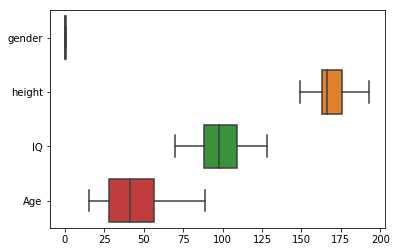

In [10]:
sb.boxplot(data = finalDataset, orient = 'h')

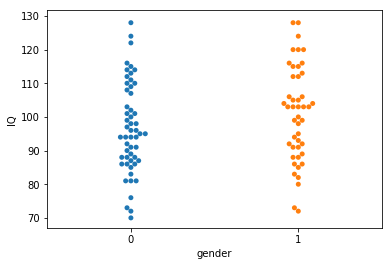

In [33]:
sb.swarmplot(x='gender', y='IQ', data=finalDataset)

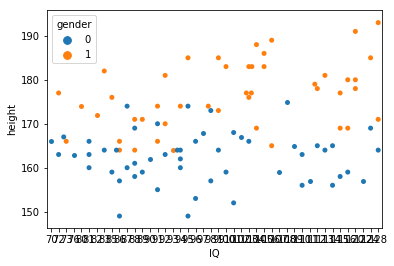

In [34]:
sb.swarmplot(x='IQ', y='height', hue = 'gender', data=finalDataset)

C:\Users\sarah\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


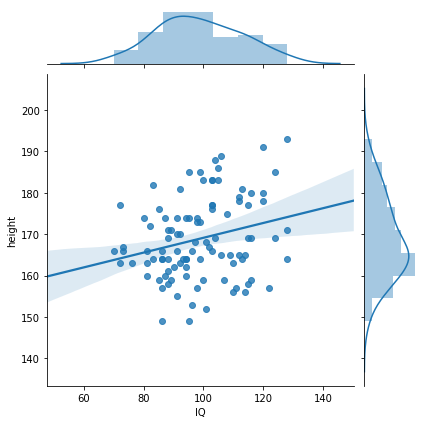

In [35]:
sb.jointplot(x='IQ', y='height', data=finalDataset, kind = 'reg') 

# 5. Summary <a class="anchor" id="5"></a>

The introduction laid out the task that was hoped to be accomplished within this notebook, namely to generate a dataset with a 100 datapoints across 4 variables synthesising a real-life phenomenon. Following, an introduction to the subject matter IQ was given, followed by a line-up of the variables that were synthesised for this dataset: IQ, age, height and gender. The variables were explored both in regards to their distributions in the real world as well as their connection to the ancor of the dataset, IQ, and how data for this variable can be generated in Python. This was mostly focused around using different functions of the `numpy.random`module, such as `.choice`. It was outlined how simple sampling can quickly yield a desired amount of data, however, doesn't necessarily ensure that the data is close to a real-life dataset, because this method does not consider correlations between the different variables. After this, additional code was introduced to ensure the variables interact as would be expected in the dataset, namely with regards to the correlation between height and IQ, as well as gender and height. Finally, a sensecheck on the synthesised dataset followed that laid out the summary statistics and presented graphs to give a feel of the generated dataset. 


# 6. Conclusion <a class="anchor" id="6"></a>

There are many approaches to generate a dataset, this approach focused generating random data in a structured way by knowing the desired outcome by using Python and more specifically the package numpy to generate random data and pandas to concatenate the generated data into a dataframe.

Synthesising data can be very useful when trying to avoid working on sensitive data in a business environment, when gathering the necessary amount of data would be too cumbersome and time consuming and therefore too expensive, or to simply generate data for a machine learning algorithm to work on.